Forecast Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Example data for demonstration 2023 WIP
data = {
    'Month': pd.date_range(start='2021-01-01', periods=35, freq='ME'),
    'Demand': [2549, 3073, 3496, 4075, 4140, 4515, 4455, 4511, 2671, 3594, 4131, 4097,
               4793, 3492, 6124, 6250, 5369, 6614, 6170, 9038, 7351, 7749, 8334, 5759, 
               8543, 7898, 8322, 6784, 7682, 8341, 7728, 7985, 7555, 5224, 6212],  # Demand data
    'WIP': [1386, 1085, 1805, 2065, 2196, 1894, 1423, 1493, 2050, 2538, 2818, 2703,
            2580, 2820, 3513, 3516, 4141, 4149, 4492, 4341, 4539, 4710, 4637, 4041,
            3484, 3451, 3937, 4493, 4340, 3799, 3565, 3830, 4156, 5015, 4553]     # Your WIP data
}
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)


df


,Demand,WIP
Month,,
2021-01-31,2549,1386
2021-02-28,3073,1085
2021-03-31,3496,1805
2021-04-30,4075,2065
2021-05-31,4140,2196
2021-06-30,4515,1894
2021-07-31,4455,1423
2021-08-31,4511,1493
2021-09-30,2671,2050


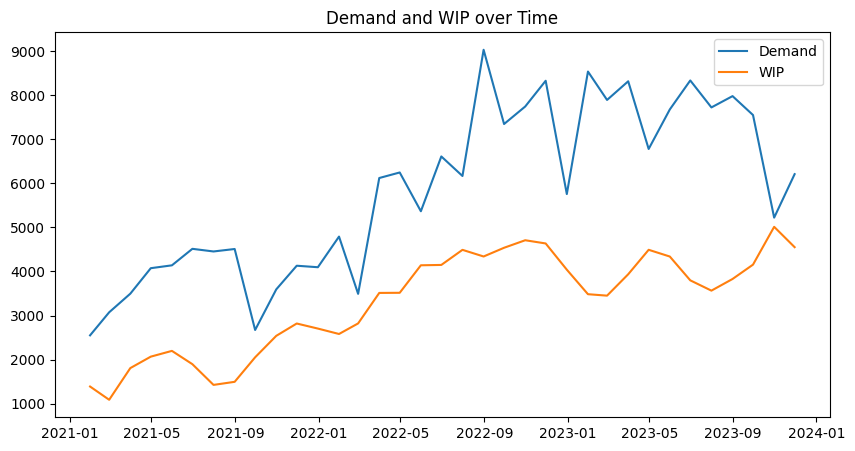

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(df['Demand'], label='Demand')
plt.plot(df['WIP'], label='WIP')
plt.title("Demand and WIP over Time")
plt.legend()
plt.show()

In [4]:
# Define predictors and target
X = df[['Demand']]
y = df['WIP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the model’s performance
print("Model Coefficient:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficient: [0.54765652]
Model Intercept: 186.4408079270802


In [5]:
# Predict WIP for the test set
y_pred_test = model.predict(X_test)

# Calculate Mean Absolute Error (for evaluating the model)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error on Test Set:", mae)

# Forecast WIP for future demand
future_demand = pd.DataFrame({
    'Demand': [8059, 6927, 7881, 10063, 9120, 10246, 9196, 12068, 9685, 12281, 10077, 8643]  # Example demand values for each month in 2024
}) # Example future demand data
future_wip_forecast = model.predict(future_demand)

print("Future WIP Forecast based on Demand:", future_wip_forecast)


Mean Absolute Error on Test Set: 718.9883634806438
Future WIP Forecast based on Demand: [ 4600.00468636  3980.057508    4502.52182616 10626.41701025
  7371.69432388  5797.72949119  5222.69014731  6795.55966696
  5490.4941846   6912.21050529  5705.17553965  4919.83609286]


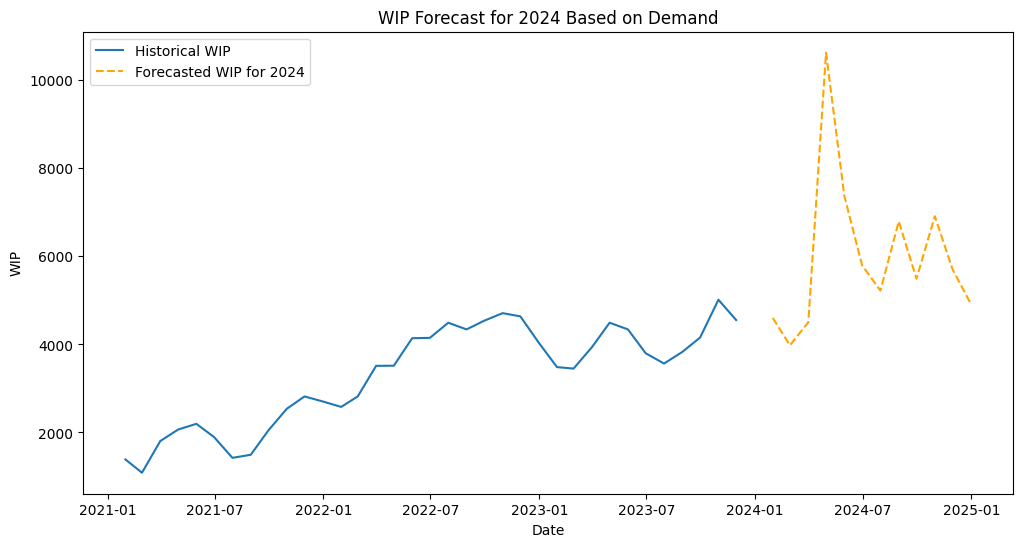

WIP Forecast for each month in 2024:
             WIP_Forecast
2024-01-31   4600.004686
2024-02-29   3980.057508
2024-03-31   4502.521826
2024-04-30  10626.417010
2024-05-31   7371.694324
2024-06-30   5797.729491
2024-07-31   5222.690147
2024-08-31   6795.559667
2024-09-30   5490.494185
2024-10-31   6912.210505
2024-11-30   5705.175540
2024-12-31   4919.836093


In [6]:
# Generate future dates for each month in 2024
future_dates = pd.date_range(start='2024-01-31', periods=12, freq='ME')
forecast_df = pd.DataFrame({'WIP_Forecast': future_wip_forecast}, index=future_dates)

# Plot the historical and forecasted WIP, including the full year 2024
plt.figure(figsize=(12, 6))
plt.plot(df['WIP'], label='Historical WIP')
plt.plot(forecast_df['WIP_Forecast'], label='Forecasted WIP for 2024', linestyle='--', color='orange')
plt.title("WIP Forecast for 2024 Based on Demand")
plt.xlabel("Date")
plt.ylabel("WIP")
plt.legend()
plt.show()

# Print the forecasted WIP values for each month in 2024
print("WIP Forecast for each month in 2024:\n", forecast_df)


In [7]:
actual_data = [4548, 4567, 4309, 5078, 5232, 5671, 6259, 6662, 7220, 6750, 6135, 5840]
forecast_df['Actual'] = actual_data

forecast_df['Difference'] = forecast_df['Actual'] - forecast_df['WIP_Forecast']

forecast_df


,WIP_Forecast,Actual,Difference
2024-01-31,4600.004686,4548,-52.004686
2024-02-29,3980.057508,4567,586.942492
2024-03-31,4502.521826,4309,-193.521826
2024-04-30,10626.417010,5078,-5548.417010
2024-05-31,7371.694324,5232,-2139.694324
2024-06-30,5797.729491,5671,-126.729491
2024-07-31,5222.690147,6259,1036.309853
2024-08-31,6795.559667,6662,-133.559667
2024-09-30,5490.494185,7220,1729.505815
2024-10-31,6912.210505,6750,-162.210505


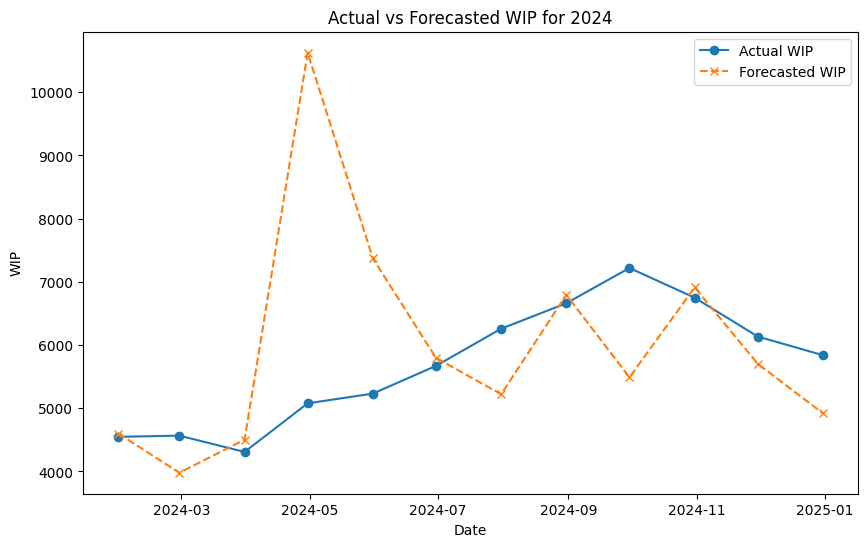

In [8]:
# Plot the Actual vs. Forecasted WIP
plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df['Actual'], label='Actual WIP', marker='o')
plt.plot(forecast_df.index, forecast_df['WIP_Forecast'], label='Forecasted WIP', linestyle='--', marker='x')
plt.title("Actual vs Forecasted WIP for 2024")
plt.xlabel("Date")
plt.ylabel("WIP")
plt.legend()
plt.show()